# Машинное обучение

## Факультет математики НИУ ВШЭ

### 2018-2019 учебный год

Лектор: Илья Щуров

Семинаристы: Евгения Ческидова, Евгений Ковалев

Ассистенты: Константин Ваниев, Софья Дымченко

# Семинар 2

На этом семинаре мы:

- посмотрим, как можно проводить эксперименты из области математической статистики с помощью Python
- познакомимся со статистической библиотекой SciPy
- проверим работу центральной предельной теоремы
- будем проводить собственные исследования!

## 1 Знакомство с SciPy

С помощью языка Python можно проводить эксперименты из области математической статистики. Например, библиотека для научных и инженерных расчетов [SciPy](http://scipy.github.io/devdocs/index.html) содержит модуль [stats](http://scipy.github.io/devdocs/stats.html#module-scipy.stats), позволяющий работать с распределениями и статистическими функциями. Посмотрим, что можно делать с помощью него.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts

%matplotlib inline

plt.style.use('ggplot')

In [2]:
# чтобы заработало, почему-то нужно писать в другой ячейке, отдельно от импортирования библиотек
plt.rcParams["figure.figsize"] = (10,7)

Зададим нормально распределенную случайную величину с параметрами $\mu = 1$ и $\sigma = 0.5$:

In [3]:
mu = 1
sigma = 0.5

# loc - параметр среднего, scale - параметр среднеквадратичного отклонения
norm_rv = sts.norm(loc=mu, scale=sigma)

Построим график функции распределения:

In [4]:
np.linspace(-1, 3, 100)

array([-1.        , -0.95959596, -0.91919192, -0.87878788, -0.83838384,
       -0.7979798 , -0.75757576, -0.71717172, -0.67676768, -0.63636364,
       -0.5959596 , -0.55555556, -0.51515152, -0.47474747, -0.43434343,
       -0.39393939, -0.35353535, -0.31313131, -0.27272727, -0.23232323,
       -0.19191919, -0.15151515, -0.11111111, -0.07070707, -0.03030303,
        0.01010101,  0.05050505,  0.09090909,  0.13131313,  0.17171717,
        0.21212121,  0.25252525,  0.29292929,  0.33333333,  0.37373737,
        0.41414141,  0.45454545,  0.49494949,  0.53535354,  0.57575758,
        0.61616162,  0.65656566,  0.6969697 ,  0.73737374,  0.77777778,
        0.81818182,  0.85858586,  0.8989899 ,  0.93939394,  0.97979798,
        1.02020202,  1.06060606,  1.1010101 ,  1.14141414,  1.18181818,
        1.22222222,  1.26262626,  1.3030303 ,  1.34343434,  1.38383838,
        1.42424242,  1.46464646,  1.50505051,  1.54545455,  1.58585859,
        1.62626263,  1.66666667,  1.70707071,  1.74747475,  1.78

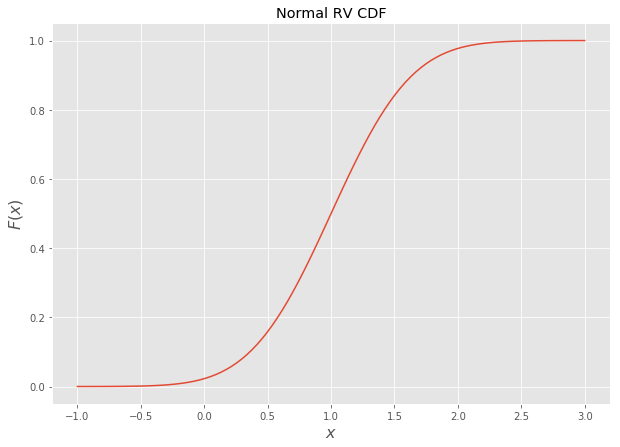

In [5]:
x = np.linspace(-1, 3, 100)
norm_cdf = norm_rv.cdf(x)
#plt.figure(figsize=(10,7))
plt.plot(x, norm_cdf)
plt.title('Normal RV CDF')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$F(x)$', fontsize=16)
plt.show()

Давайте добавим еще распределений!

In [6]:
# равномерное непрерывное
a = -1
b = 3
# loc - параметр левой границы, scale - параметр масштаба (то есть правая граница - loc+scale)
uniform_rv = sts.uniform(loc=a, scale=b-a)

# биномиальное
n = 5
p = 0.5
binom_rv = sts.binom(n=n, p=p)

# Пуассона
mu = 5
poisson_rv = sts.poisson(mu=mu)

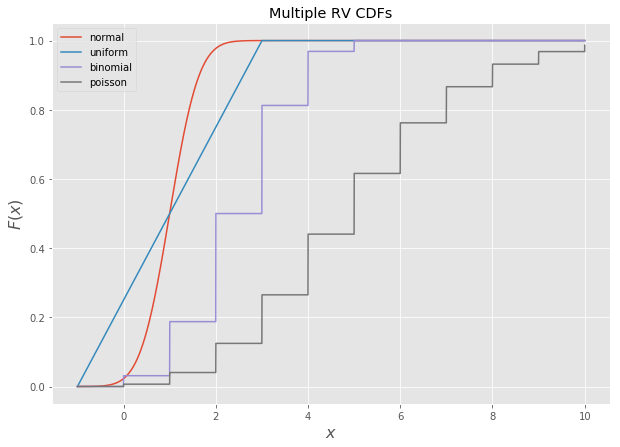

In [7]:
x = np.linspace(-1, 10, 10000)
norm_cdf = norm_rv.cdf(x)
uniform_cdf = uniform_rv.cdf(x)
binom_cdf = binom_rv.cdf(x)
poisson_cdf = poisson_rv.cdf(x)
plt.plot(x, norm_cdf, label='normal')
plt.plot(x, uniform_cdf, label='uniform')
plt.plot(x, binom_cdf, label='binomial')
plt.plot(x, poisson_cdf, label='poisson')
plt.title('Multiple RV CDFs')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$F(x)$', fontsize=16)
plt.legend(loc='best')
plt.show()

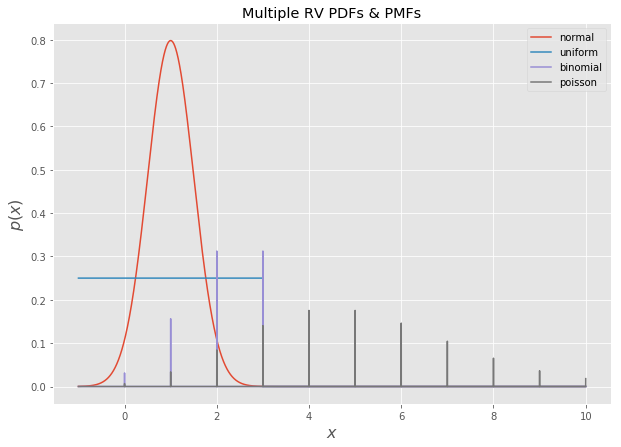

In [8]:
x = np.linspace(-1, 10, 10000)
norm_pdf = norm_rv.pdf(x)
uniform_pdf = uniform_rv.pdf(x)
binom_pdf = binom_rv.pmf(x)
poisson_pdf = poisson_rv.pmf(x)
plt.plot(x, norm_pdf, label='normal')
plt.plot(x, uniform_pdf, label='uniform')
plt.plot(x, binom_pdf, label='binomial')
plt.plot(x, poisson_pdf, label='poisson')
plt.title('Multiple RV PDFs & PMFs')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$p(x)$', fontsize=16)
plt.legend(loc='best')
plt.show()

Сгенерируем выборку нормальной случайной величины, упомянутой ранее:

In [9]:
# выбираем число, задающее генератор случайных чисел, чтобы всегда получать один и тот же результат
np.random.seed(0)

norm_sample = norm_rv.rvs(size=1000)

Посчитайте с помощью этой выборки доверительный интервал для среднего с уровнем доверия $95\%$. Исходя из теоретических соображений, доверительный интервал с уровнем доверия $1 - \alpha$ может быть представлен в следующем виде:
$$
\left(\hat{\mu} - z_{1 - \frac{\alpha}{2}}\frac{\hat{se}\left(\hat{\mu}\right)}{\sqrt{n}}, \ \hat{\mu} + z_{1 - \frac{\alpha}{2}}\frac{\hat{se}\left(\hat{\mu}\right)}{\sqrt{n}}\right)
$$
Оценку $\hat{\mu}$ можно получить методом максимального правдоподобия - она будет равна выборочному среднему. Аналогично, оценка стандартной ошибки $\hat{se}\left(\hat{\mu}\right)$ будет выборочным стандартным отклонением. Квантиль же в нашем случае равен $z_{0.975}$.

_Квантиль можно посчитать с помощью функции scipy.stats.norm.ppf()_

In [10]:
def CI_calculate(sample):
    # YOUR CODE HERE
    return (CI_left_bound, CI_right_bound)

Содержит ли построенный интервал искомое значение среднего? А если провести эксперимент много раз, какая доля построенных доверительных интервалов будет содержать это значение? Убедитесь в этом на практике.

In [11]:
# YOUR CODE HERE

## 2 Проверка ЦПТ

Проверим работу центральной предельной теоремы. Выберем какое-нибудь распределение, не очень похожее на нормальное - например, [Распределение хи-квадрат](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82). Построим случайную величину, имеющую данное распределение, с заданными параметрами:

In [12]:
# число степеней свободы
df = 4

chi2_rv = sts.chi2(df=df)

Сгенерируем выборку размера 1000:

In [13]:
sample = chi2_rv.rvs(size=1000)

In [14]:
sample[:10]

array([4.98474584, 6.20948505, 2.35749936, 3.61107969, 3.95751724,
       3.88108438, 4.93363589, 0.49787183, 1.36016427, 9.79284962])

Построим гистограмму выборки, изобразив поверх нее теоретическую плотность распределения рассматриваемой случайной величины:

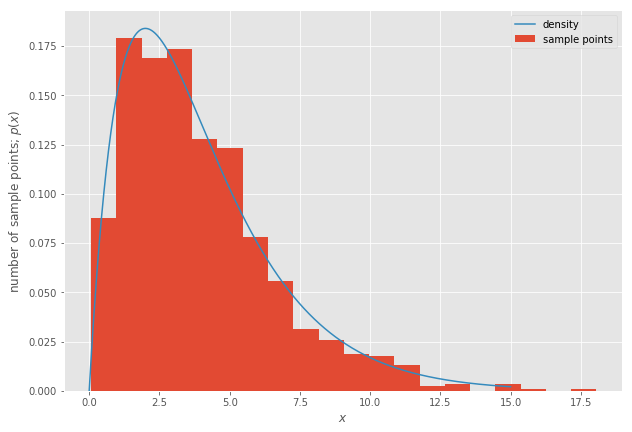

In [15]:
# сначала строим гистограмму выборки
plt.hist(sample, bins=20, density=True, label='sample points')
# теперь строим график плотности
x = np.linspace(0, 15, 10000)
chi2_pdf = chi2_rv.pdf(x)
plt.plot(x, chi2_pdf, label='density')
plt.xlabel('$x$')
plt.ylabel('number of sample points; $p(x)$')
plt.legend(loc='best')
plt.show()

Согласно ЦПТ, выборочное среднее выборки объема $n$ будет иметь распределение, близкое к $N\left(\mu, \frac{\sigma^2}{n}\right)$. Мы рассматриваем распределение хи-квадрат с $k=4$ степенями свободы. В этом случае $\mu = k = 4$, $\sigma^2 = 2k = 8$. Таким образом, $\bar{X}_n \to N\left(4, \frac{8}{n}\right)$ по распределению. 

Теперь проверим это на практике. Будем генерировать набор выборок размера $n$ (например, 1000 выборок размера $n$), считать набор их выборочных средних, строить их гистограммы и соотносить их с теоретической плотностью соответствующего нормального распределения. Для этого напишем функцию:

In [16]:
def sample_mean_distr(n):
    # YOUR CODE HERE
    plt.show()

Посмотрим, что получается при подстановке различных значений $n$.

In [17]:
sample_mean_distr(5)

In [18]:
sample_mean_distr(10)

In [19]:
sample_mean_distr(25)

In [20]:
sample_mean_distr(50)

In [21]:
sample_mean_distr(100)

## 3 Квартет Энскомба (задание для самостоятельной работы)

Рассмотрим четыре различных набора пар $\left(x_n, y_n\right)$.

In [ ]:
data = pd.read_csv('anscombe.csv', index_col=0)

In [ ]:
data

Посчитайте выборочное среднее и выборочную дисперсию для каждого столбца, **не пользуясь функциями .mean(), .std() и .var()** (и проверьте свой ответ с помощью них).

In [ ]:
for col in data.columns:
    # YOUR CODE HERE
    print(col, col_mean, col_var)

Найдите коэффициент корреляции Пирсона для каждой пары $(x_n, y_n)$, __не пользуясь функциями .corr(), .pearsonr() и тому подобными__ (и проверьте свой ответ с помощью них).

In [ ]:
for i in range(4):
    # YOUR CODE HERE
    print(x_name, y_name, pearson_corr)

Теперь изобразите диаграмму рассеяния для каждой из пар $\left(x_n, y_n\right)$ вместе с прямой линейной регрессии $y = 3 + 0.5x$, обозначенной другим цветом.

In [ ]:
for i in range(4):
    # YOUR CODE HERE
    plt.title('scatterplot #' + str(i + 1))
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

Какой вывод можно сделать из этого небольшого проделанного исследования?

# 4 Действительно ли алкоголь влияет на учебу?

На прошлом семинаре мы сделали предварительное предположение о том, что употребление алкоголя влияет на успехи в учебе: те, кто употребляет больше алкоголя в будние дни, учатся хуже, чем те, кто лучше себя в этом плане контролирует. Проверьте это предположение с помощью t-критерия Стьюдента.

In [ ]:
data = pd.read_csv('math_students.csv', delimiter=',')

In [ ]:
# YOUR CODE HERE